## Coding project

In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dslabs)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# making a variable of each table for denmark
D052020 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2020-W05.csv")
D222020 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2020-W22.csv")
D402020 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2020-W40.csv")
D042021 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2021-W04.csv")
D212021 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2021-W21.csv")
D392021 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2021-W39.csv")
D042022 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2022-W04.csv")
D212022 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2022-W21.csv")
D392022 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2022-W39.csv")
D042023 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2023-W04.csv")
D222023 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2023-W22.csv")
D392023 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2023-W39.csv")
D052024 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2024-W05.csv")
D222024 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2024-W22.csv")
D392024 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2024-W39.csv")

In [4]:
# adding column with weekname and year
D052020 <- data.frame(append(D052020, c(Week='052020', Year='2020'), after=1))
D222020 <- data.frame(append(D222020, c(Week='222020', Year='2020'), after=1))
D402020 <- data.frame(append(D402020, c(Week='402020', Year='2020'), after=1))
D042021 <- data.frame(append(D042021, c(Week='042021', Year='2021'), after=1))
D212021 <- data.frame(append(D212021, c(Week='212021', Year='2021'), after=1))
D392021 <- data.frame(append(D392021, c(Week='392021', Year='2021'), after=1))
D042022 <- data.frame(append(D042022, c(Week='042022', Year='2022'), after=1))
D212022 <- data.frame(append(D212022, c(Week='212022', Year='2022'), after=1))
D392022 <- data.frame(append(D392022, c(Week='392022', Year='2022'), after=1))
D042023 <- data.frame(append(D042023, c(Week='042023', Year='2023'), after=1))
D222023 <- data.frame(append(D222023, c(Week='222023', Year='2023'), after=1))
D392023 <- data.frame(append(D392023, c(Week='392023', Year='2023'), after=1))
D052024 <- data.frame(append(D052024, c(Week='052024', Year='2024'), after=1))
D222024 <- data.frame(append(D222024, c(Week='222024', Year='2024'), after=1))
D392024 <- data.frame(append(D392024, c(Week='392024', Year='2024'), after=1))

In [5]:
#Bind all the dataframes into one dataframe
Danmark <- rbind(D052020, D222020, D402020, D042021,D212021,D392021,D042022,D212022,D392022,D042023,D222023,D392023,D052024,D222024,D392024)

In [6]:
#Checking column names
str(Danmark)

'data.frame':	1501 obs. of  14 variables:
 $ Position                        : chr  "1" "2" "3" "4" ...
 $ Week                            : chr  "052020" "052020" "052020" "052020" ...
 $ Year                            : chr  "2020" "2020" "2020" "2020" ...
 $ Up.or.Down                      : chr  "up" "up" "up" "up" ...
 $ Artist                          : chr  "The Weeknd" "Billie Eilish" "Tones and I" "Roddy Ricch" ...
 $ Song                            : chr  "Blinding Lights" "everything i wanted" "Dance Monkey" "The Box" ...
 $ Last.Week                       : chr  "1" "7" "3" "4" ...
 $ Peak.Position                   : int  1 2 1 4 2 3 2 1 2 8 ...
 $ Weeks.on.Chart                  : int  10 12 13 5 3 13 13 4 5 7 ...
 $ Global.Chart.Debut              : int  94 53 6 91 84 5 19 86 86 NA ...
 $ Week.GC                         : chr  "2019-12-01" "2019-11-17" "2019-10-06" "2019-12-08" ...
 $ Highest.Position.in.Global.Chart: int  1 3 1 2 12 5 3 6 3 NA ...
 $ Week.HP           

In [7]:
#Removing unwanted columns
Danmark2 = select(Danmark, -Up.or.Down:-Week.HP)
head(Danmark2)

,Position,Week,Year,Gender
,<chr>,<chr>,<chr>,<int>
1,1,052020,2020,2
2,2,052020,2020,1
3,3,052020,2020,1
4,4,052020,2020,2
5,5,052020,2020,2
6,6,052020,2020,1


In [8]:
#converting Gender from integer to factor
Danmark2[,'Gender'] <- as.factor(as.integer(Danmark2[,'Gender']))

In [9]:
#Checking
head(Danmark2)

,Position,Week,Year,Gender
,<chr>,<chr>,<chr>,<fct>
1,1,052020,2020,2
2,2,052020,2020,1
3,3,052020,2020,1
4,4,052020,2020,2
5,5,052020,2020,2
6,6,052020,2020,1


In [10]:
Danmark2[,'Year'] <- as.integer(as.character(Danmark2[,'Year']))
Danmark2[,'Week'] <- as.integer(as.character(Danmark2[,'Week']))

In [15]:
head(Danmark2)

,Position,Week,Year,Gender
,<chr>,<int>,<int>,<fct>
1,1,52020,2020,2
2,2,52020,2020,1
3,3,52020,2020,1
4,4,52020,2020,2
5,5,52020,2020,2
6,6,52020,2020,1


In [17]:
# summarised female representation for each week
just_womenD <- Danmark2 %>%
    filter(Gender == 1) %>%
    group_by(Week, Year) %>%
    summarise(count = n())

`summarise()` has grouped output by 'Week'. You can override using the
`.groups` argument.


In [18]:
#show
just_womenD

Week,Year,count
<int>,<int>,<int>
42021,2021,29
42022,2022,23
42023,2023,15
52020,2020,24
52024,2024,22
212021,2021,28
212022,2022,14
222020,2020,28
222023,2023,17


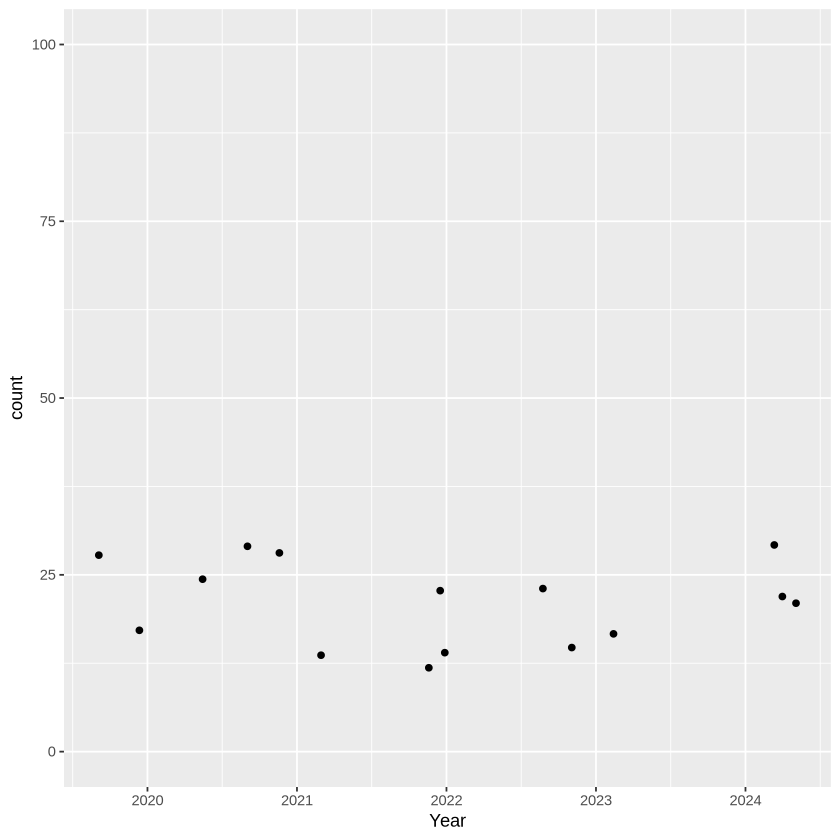

In [33]:
#plotting the data
ggplot(just_womenD,
       aes(x = Year,
           y = count)) +
    geom_point(position = 'jitter') +
    ylim(0,100)

In [ ]:
# tommorrow: run test to show no correlation

In [ ]:
# making a variable of each table for norway
N052020 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2020-W05.csv")
N222020 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2020-W22.csv")
N402020 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2020-W40.csv")
N042021 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2021-W04.csv")
N212021 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2021-W21.csv")
N392021 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2021-W39.csv")
N042022 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2022-W04.csv")
N212022 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2022-W21.csv")
N392022 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2022-W39.csv")
N042023 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2023-W04.csv")
N222023 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2023-W22.csv")
N392023 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2023-W39.csv")
N052024 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2024-W05.csv")
N222024 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2024-W22.csv")
N392024 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2024-W39.csv")

In [ ]:
# adding column with weekname and year
N052020 <- data.frame(append(N052020, c(Week='05-2020', Year='2020'), after=1))
N222020 <- data.frame(append(N222020, c(Week='22-2020', Year='2020'), after=1))
N402020 <- data.frame(append(N402020, c(Week='40-2020', Year='2020'), after=1))
N042021 <- data.frame(append(N042021, c(Week='04-2021', Year='2021'), after=1))
N212021 <- data.frame(append(N212021, c(Week='21-2021', Year='2021'), after=1))
N392021 <- data.frame(append(N392021, c(Week='39-2021', Year='2021'), after=1))
N042022 <- data.frame(append(N042022, c(Week='04-2022', Year='2022'), after=1))
N212022 <- data.frame(append(N212022, c(Week='21-2022', Year='2022'), after=1))
N392022 <- data.frame(append(N392022, c(Week='39-2022', Year='2022'), after=1))
N042023 <- data.frame(append(N042023, c(Week='04-2023', Year='2023'), after=1))
N222023 <- data.frame(append(N222023, c(Week='22-2023', Year='2023'), after=1))
N392023 <- data.frame(append(N392023, c(Week='39-2023', Year='2023'), after=1))
N052024 <- data.frame(append(N052024, c(Week='05-2024', Year='2024'), after=1))
N222024 <- data.frame(append(N222024, c(Week='22-2024', Year='2024'), after=1))
N392024 <- data.frame(append(N392024, c(Week='39-2024', Year='2024'), after=1))

In [ ]:
#Binding dataframes together

Norge <- rbind(N052020, N222020, N402020, N042021,N212021,N392021,N042022,N212022,N392022,N042023,N222023,N392023,N052024,N222024,N392024)

In [ ]:
#Checking
str(Norge)

In [ ]:
#Removing unwanted columns
Norge2 = select(Norge, -Up.or.Down:-Week.HP)
head(Norge2)

In [ ]:
#converting Gender from integer to factor
Norge2[,'Gender'] <- as.factor(as.integer(Norge2[,'Gender']))

In [ ]:
#checking
head(Norge2)

In [34]:
just_womenN <- Norge2 %>%
    filter(Gender == 1) %>%
    group_by(Week, Year) %>%
    summarise(count = n())

ERROR: Error: object 'Norge2' not found
